In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
df = pd.read_csv('data/train.csv')
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [74]:
df.breath_id.unique()

array([     1,      2,      3, ..., 125743, 125745, 125749])

In [75]:
df.u_in.head()

0     0.083334
1    18.383041
2    22.509278
3    22.808822
4    25.355850
Name: u_in, dtype: float64

In [76]:
df.time_step.head()

0    0.000000
1    0.033652
2    0.067514
3    0.101542
4    0.135756
Name: time_step, dtype: float64

In [77]:
df.groupby('time_step').count()

,id,breath_id,R,C,u_in,u_out,pressure
time_step,,,,,,,
0.000000,75450,75450,75450,75450,75450,75450,75450
0.031460,1,1,1,1,1,1,1
0.031484,1,1,1,1,1,1,1
0.031518,1,1,1,1,1,1,1
0.031518,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
2.905639,1,1,1,1,1,1,1
2.928005,1,1,1,1,1,1,1
2.934589,1,1,1,1,1,1,1


In [78]:
df.head(20)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [79]:
df.groupby('breath_id').count()

,id,R,C,time_step,u_in,u_out,pressure
breath_id,,,,,,,
1,80,80,80,80,80,80,80
2,80,80,80,80,80,80,80
3,80,80,80,80,80,80,80
4,80,80,80,80,80,80,80
5,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...
125740,80,80,80,80,80,80,80
125742,80,80,80,80,80,80,80
125743,80,80,80,80,80,80,80


In [80]:
first_breath=df.query('breath_id==1')

<AxesSubplot:xlabel='time_step', ylabel='u_in'>

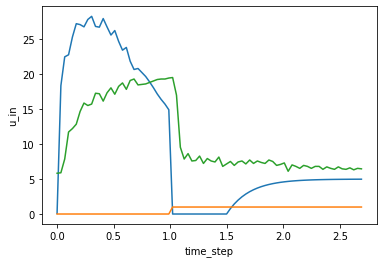

In [81]:
fig=plt.figure()
sns.lineplot(data=first_breath, x='time_step', y='u_in')
sns.lineplot(data=first_breath, x='time_step', y='u_out')
sns.lineplot(data=first_breath, x='time_step', y='pressure')

In [82]:
df.groupby('breath_id').count()

,id,R,C,time_step,u_in,u_out,pressure
breath_id,,,,,,,
1,80,80,80,80,80,80,80
2,80,80,80,80,80,80,80
3,80,80,80,80,80,80,80
4,80,80,80,80,80,80,80
5,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...
125740,80,80,80,80,80,80,80
125742,80,80,80,80,80,80,80
125743,80,80,80,80,80,80,80


In [83]:
df.C.unique()

array([50, 20, 10])

In [84]:
#fig=plt.figure()
#sns.barplot(data=df, x='time_step', y='u_in')

In [85]:
#max(df.time_step.unique())

<AxesSubplot:xlabel='time_step', ylabel='u_in'>

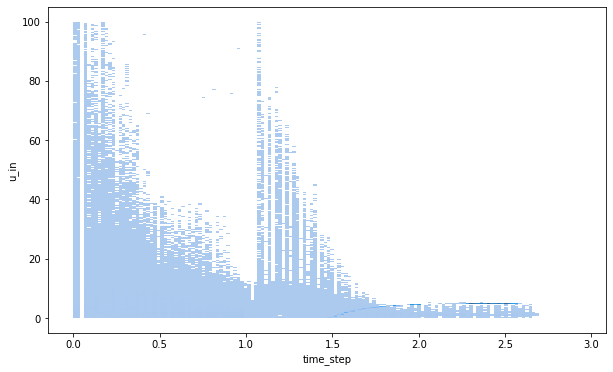

In [86]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df.query('C==10'), x='time_step', y='u_in')

<AxesSubplot:xlabel='time_step', ylabel='u_in'>

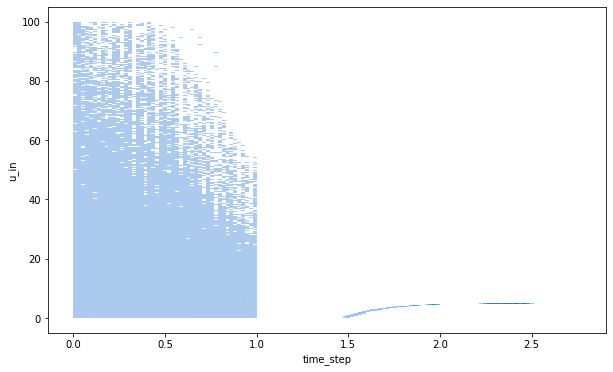

In [87]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df.query('C==20'), x='time_step', y='u_in')

<AxesSubplot:xlabel='time_step', ylabel='u_in'>

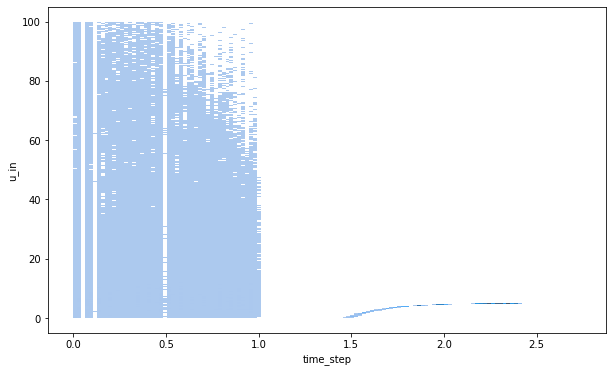

In [88]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df.query('C==50'), x='time_step', y='u_in')

In [89]:
df=df.query('u_out==0')

In [99]:
df.time_step.head(33)

0     0.000000
1     0.033652
2     0.067514
3     0.101542
4     0.135756
5     0.169698
6     0.203708
7     0.237723
8     0.271776
9     0.305732
10    0.339675
11    0.373680
12    0.407650
13    0.441804
14    0.476103
15    0.509996
16    0.544041
17    0.578179
18    0.612109
19    0.646055
20    0.680176
21    0.715327
22    0.749344
23    0.783241
24    0.817397
25    0.851411
26    0.885488
27    0.919468
28    0.953547
29    0.987487
80    0.000000
81    0.033998
82    0.068151
Name: time_step, dtype: float64

In [91]:
#b_ids = df.breath_id.unique()
#
#for b_id in b_ids:
    

## feature engineering

In [92]:
df['vol'] = df['time_step'] * df['u_in']
df['vol'] = df.query('u_out==0').groupby('breath_id')['vol'].cumsum()

In [93]:
df.vol.head(31)


0       0.000000
1       0.618632
2       2.138333
3       4.454391
4       7.896588
5      12.522527
6      18.048611
7      24.421415
8      31.994388
9      40.650583
10     49.776548
11     59.777281
12     71.188746
13     83.024635
14     95.229088
15    108.631874
16    122.084213
17    135.652850
18    150.256823
19    164.394700
20    178.475050
21    193.385043
22    208.573642
23    223.998541
24    239.469649
25    254.874925
26    270.099966
27    285.196951
28    300.210255
29    314.955013
80      0.000000
Name: vol, dtype: float64

In [94]:
df.query('vol==0.')

,id,breath_id,R,C,time_step,u_in,u_out,pressure,vol
0,1,1,20,50,0.000000,0.083334,0,5.837492,0.0
80,81,2,20,20,0.000000,12.184338,0,6.048398,0.0
160,161,3,50,20,0.000000,0.000000,0,5.064168,0.0
240,241,4,50,50,0.000000,0.000000,0,6.259305,0.0
320,321,5,5,50,0.000000,21.424375,0,6.329607,0.0
...,...,...,...,...,...,...,...,...,...
6035760,6035761,125743,20,10,0.000000,0.000000,0,6.259305,0.0
6035761,6035762,125743,20,10,0.033683,0.000000,0,5.907794,0.0
6035762,6035763,125743,20,10,0.067383,0.000000,0,6.048398,0.0
6035840,6035841,125745,50,50,0.000000,15.564236,0,6.962326,0.0


<AxesSubplot:xlabel='time_step', ylabel='vol'>

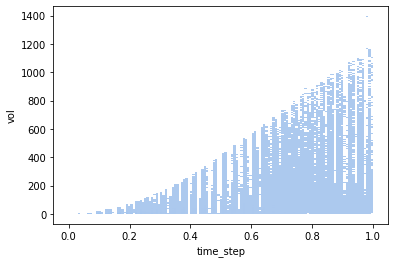

In [95]:
sns.histplot(data=df, x='time_step', y='vol')

In [98]:
df.time_step.unique()

1162861

In [100]:
round(0.033998,3)

0.034

In [102]:
df['rtime']=df['time_step'].apply(lambda x: round(x,3))

In [103]:
df.rtime.nunique()

858

In [106]:
df.query('id%80==2')

,id,breath_id,R,C,time_step,u_in,u_out,pressure,vol,rtime
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.618632,0.034
81,82,2,20,20,0.033998,13.980205,0,7.524743,0.475293,0.034
161,162,3,50,20,0.031964,7.187242,0,5.064168,0.229732,0.032
241,242,4,50,50,0.031854,1.262539,0,5.767190,0.040216,0.032
321,322,5,5,50,0.033967,28.504653,0,7.384139,0.968218,0.034
...,...,...,...,...,...,...,...,...,...,...
6035601,6035602,125740,50,50,0.034880,0.000000,0,5.837492,0.000000,0.035
6035681,6035682,125742,20,10,0.033818,100.000000,0,11.391361,3.381801,0.034
6035761,6035762,125743,20,10,0.033683,0.000000,0,5.907794,0.000000,0.034
6035841,6035842,125745,50,50,0.031680,23.588836,0,8.790182,0.747286,0.032


In [135]:
df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
df['minus_one']=-1.0
df['plus_one']=1.0
df['exponent']=(df['minus_one']*df['time_step'])/(df['R']*df['C'])
df['factor']=np.exp(df['exponent'])
df['vf']=(df['u_in_cumsum']*df['R'])/df['factor']
df['vt']=0
df.loc[df['time_step'] != 0, 'vt']=df['vol']/(df['C']*(df['minus_one']*df['factor']+df['plus_one']))
df['v']=df['vf']+df['vt']

In [161]:
cols=['v','u_in_cumsum','vol','pressure', 'u_in', 'R', 'C', 'time_step']
red_df=df[cols]

In [162]:
red_df=pd.get_dummies(data=red_df, columns=['R','C'])

In [163]:
red_df.head()

,v,u_in_cumsum,vol,pressure,u_in,time_step,R_5,R_20,R_50,C_10,C_20,C_50
0,1.666680,0.083334,0.000000,5.837492,0.083334,0.000000,0,1,0,0,0,1
1,737.006954,18.466375,0.618632,5.907794,18.383041,0.033652,0,1,0,0,0,1
2,1453.034477,40.975653,2.138333,7.876254,22.509278,0.067514,0,1,0,0,0,1
3,2153.211108,63.784476,4.454391,11.742872,22.808822,0.101542,0,1,0,0,0,1
4,2946.481672,89.140326,7.896588,12.234987,25.355850,0.135756,0,1,0,0,0,1


In [164]:
linreg=LinearRegression()
linreg.fit(red_df.drop('pressure',axis=1), red_df.pressure)

LinearRegression()

In [165]:
pred=linreg.predict(red_df.drop('pressure',axis=1))

In [166]:
mean_absolute_error(pred, red_df.pressure)

4.1768587922506715

In [167]:
df.time_step_cumsum.head(31)

0      0.000000
1      0.033652
2      0.101167
3      0.202709
4      0.338464
5      0.508162
6      0.711870
7      0.949593
8      1.221369
9      1.527101
10     1.866776
11     2.240456
12     2.648107
13     3.089911
14     3.566014
15     4.076009
16     4.620050
17     5.198229
18     5.810338
19     6.456393
20     7.136569
21     7.851896
22     8.601240
23     9.384481
24    10.201878
25    11.053288
26    11.938776
27    12.858245
28    13.811792
29    14.799279
80     0.000000
Name: time_step_cumsum, dtype: float64

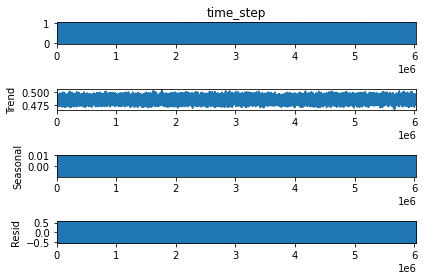

In [168]:
seas_decomp_yearly = seasonal_decompose(
    x=red_df['time_step'], 
    model='additive', 
    two_sided=True,
    period= 365)

#2. Plot
fig= seas_decomp_yearly.plot()